In [12]:
#author: Waldemar Wieczorek
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import os
datafolder = "data"

# Linear regression data generator

This file contains the generator of linear data following the relation:
$$ y = \sum^N_i a_i x_i + b_i$$

the range of each variable is also random. It goes from -x_i_range to x_i_range with equal step. Later I added a noise.



### Genareting data without noise

In [6]:
colNum = 4 # number of variables
rowsNum = 500 # number of points

# add seed?

samples = np.ndarray((rowsNum,colNum+1))
colnames = ["x_{}".format(i+1) for i in range(colNum)] + ["y"]
samples = pd.DataFrame(samples,columns=colnames)

#generating random coefitiens a_i
a_i = 2 * np.random.rand(colNum) -1

#generating randome value range for x_i
# variable x_i varies form -x_i_range, + x_i_range
x_i_range = np.random.randint(1,200, size=colNum)
for i in range(colNum):
    samples.iloc[:,i] = np.linspace(-x_i_range[i], x_i_range[i],rowsNum)


#calculatning label y
temp = np.zeros(rowsNum)
for i in range(colNum):
    temp = temp + a_i[i] * samples.iloc[:,i].values
samples["y"] = temp

In [7]:
#random coefficients
a_i

array([-0.03014739, -0.61496401,  0.20679079,  0.92748701])

### Data without noise

In [8]:
samples

,x_1,x_2,x_3,x_4,y
0,-42.000000,-63.000000,-54.000000,-66.000000,-32.371922
1,-41.831663,-62.747495,-53.783567,-65.735471,-32.242175
2,-41.663327,-62.494990,-53.567134,-65.470942,-32.112428
3,-41.494990,-62.242485,-53.350701,-65.206413,-31.982681
4,-41.326653,-61.989980,-53.134269,-64.941884,-31.852934
...,...,...,...,...,...
495,41.326653,61.989980,53.134269,64.941884,31.852934
496,41.494990,62.242485,53.350701,65.206413,31.982681
497,41.663327,62.494990,53.567134,65.470942,32.112428
498,41.831663,62.747495,53.783567,65.735471,32.242175


Sample plot for x_1 - straight line

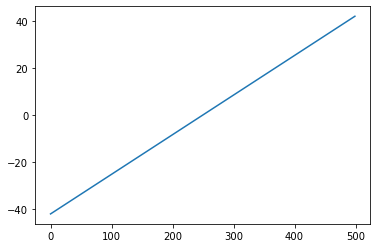

In [18]:
samples["x_1"].plot();

### Adding noise to data

In [38]:
#adding noise
noiselevel = 0.08
samples_noise = samples.apply(lambda x : np.random.normal(loc=x,scale=abs(x*noiselevel)))
samples_noise

,x_1,x_2,x_3,x_4,y
0,-41.715334,-65.182802,-56.890900,-67.773498,-37.367952
1,-47.342083,-55.963356,-50.958077,-62.633526,-27.803749
2,-41.749363,-63.283907,-51.146310,-60.999529,-33.592732
3,-43.645760,-62.236417,-44.611825,-66.307404,-31.138879
4,-42.870374,-65.969086,-50.948951,-69.082923,-33.750899
...,...,...,...,...,...
495,37.096913,58.513740,54.563351,62.148911,28.843931
496,40.042943,63.201086,51.796953,65.039032,28.679954
497,41.545086,57.330297,55.433141,74.159478,28.257894
498,44.875773,70.925529,52.952772,71.690564,36.726300


### Data visualisation and saving

Plot of data with noise 

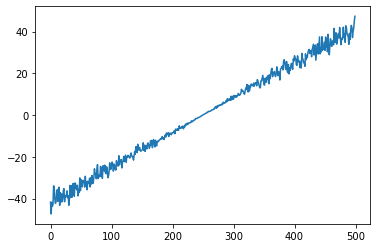

In [39]:
samples_noise["x_1"].plot();

In [40]:
#generating data frame
#to do clever way to write data
filename = "linear_reg_data_noise_{}.csv".format(int(noiselevel * 100))
path = os.path.join(datafolder,filename)
samples_noise.to_csv(path,index=False)

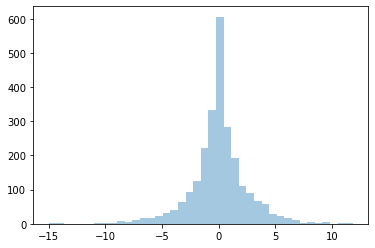

In [41]:
# distribution of added noise
sns.distplot(samples - samples_noise,kde=False, bins=40);

For further analisys I have created two files with noise level 8 and 15 %.